<ins>Table of Contents</ins>

#### - Food Data Collection from an open API (data.go.kr)
#### - Data Analysis, Cleaning and Manipulation
#### - Nearest Neighbor Algorithm on McDonalds🍔 Subset

## Food Data Collection from an open API

I collected the data from The [Open Data Portal (공공데이터 포털) - data.go.kr 🇰🇷]('https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15057436'),

Dataset Name(Korean): 식품의약품안전처_식품 영양성분 정보  
Dataset Name(English): Ministry of Food and Drug Safety(MFDS) Food Nutrional Contents Information

There were 22602 itmes in this dataset. Below is the code that was used to obtain a DataFrame with all of those items. 'Key' was the personal API key that I received from the website, which I re-wrote here as 'my-key'. I also put the code in the markdown so that the notebook would run.

import pandas as pd  
import requests  
import json  
import numpy as np  

key = 'my-key'  
url = 'http://apis.data.go.kr/1471000/FoodNtrIrdntInfoService1/getFoodNtrItdntList1'

(comment)first page of the data (first 100 items)

params ={'serviceKey' : key, 'pageNo' : '1', 'numOfRows' : '100', 'type' : 'json' }

response = requests.get(url, params=params)

data = pd.DataFrame(response.json()['body']['items'])

(comment)each page has 100 items of data, so this loop gets through 227 pages (excluding the first page) to get total of 22602 items.

for i in range(2,228):
   params ={'serviceKey' : key, 'pageNo' : str(i), 'numOfRows' : '100', 'type' : 'json' }
    
   response = requests.get(url, params=params)
    
   data_to_add = pd.DataFrame(response.json()['body']['items'])
                               
   data_to_add = data_to_add.set_index(np.arange((data.index.max()+1), (data.index.max()+1+len(data_to_add.index))))
                               
   data = pd.concat([data, data_to_add])
    
data.to_csv('data.csv')

## Data Analysis, Cleaning and Manipulation

**Importing of Libraries and the Food Data**

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../input/food-data/data.csv')

In [2]:
data.head(10)

,Unnamed: 0,DESC_KOR,SERVING_WT,NUTR_CONT1,NUTR_CONT2,NUTR_CONT3,NUTR_CONT4,NUTR_CONT5,NUTR_CONT6,NUTR_CONT7,NUTR_CONT8,NUTR_CONT9,BGN_YEAR,ANIMAL_PLANT
0,0,"고량미,알곡",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2001,NaN
1,1,"겉귀리,생것",100.0,373.0,73.5,11.4,3.7,NaN,2.0,0.0,NaN,NaN,2011,NaN
2,2,"겉귀리,생것",100.0,332.0,73.5,11.4,3.7,0.0,2.0,0.0,0.00,NaN,2017,NaN
3,3,"쌀귀리,생것",100.0,371.0,70.4,14.3,3.8,NaN,3.0,NaN,NaN,NaN,2011,NaN
4,4,"쌀귀리,생것",100.0,334.0,70.4,14.3,3.8,0.0,3.0,0.0,0.00,NaN,2017,NaN
5,5,오트밀,100.0,382.0,64.9,13.2,8.2,NaN,4.0,0.0,NaN,NaN,2011,NaN
6,6,오트밀,100.0,348.0,64.9,13.2,8.2,0.0,4.0,0.0,0.00,NaN,2017,NaN
7,7,"기장,생것",100.0,367.0,74.6,11.2,1.9,NaN,6.0,0.0,NaN,NaN,2011,NaN
8,8,"기장,생것",100.0,360.0,74.6,11.2,1.9,0.0,6.0,0.0,0.00,NaN,2017,NaN
9,9,"메밀,생것",100.0,374.0,74.7,11.5,2.3,NaN,14.0,0.0,0.59,NaN,2011,NaN


In [3]:
data.shape

(22602, 14)

Currently, there are 22602 items on this list 14 columns.

**I will drop the first column** as it seems unnecessary to keep it.

In [4]:
data.drop(data.columns[0], axis = 1, inplace = True)

data.head()

,DESC_KOR,SERVING_WT,NUTR_CONT1,NUTR_CONT2,NUTR_CONT3,NUTR_CONT4,NUTR_CONT5,NUTR_CONT6,NUTR_CONT7,NUTR_CONT8,NUTR_CONT9,BGN_YEAR,ANIMAL_PLANT
0,"고량미,알곡",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2001,NaN
1,"겉귀리,생것",100.0,373.0,73.5,11.4,3.7,NaN,2.0,0.0,NaN,NaN,2011,NaN
2,"겉귀리,생것",100.0,332.0,73.5,11.4,3.7,0.0,2.0,0.0,0.0,NaN,2017,NaN
3,"쌀귀리,생것",100.0,371.0,70.4,14.3,3.8,NaN,3.0,NaN,NaN,NaN,2011,NaN
4,"쌀귀리,생것",100.0,334.0,70.4,14.3,3.8,0.0,3.0,0.0,0.0,NaN,2017,NaN


**Renaming of the Columns**

Columns will be renamed according to the data description page.

In [5]:
Food_Columns = ['Food Name', '1 Serving Amount(g)', 'Calories', 'Carbohydrates',
                'Protein', 'Fat', 'Sugar', 'Sodium', 'Cholesterol', 'Saturated Fat',
                'Trans Fat', 'Year Constructed', 'Processing Company']

data.rename(columns = dict(zip(data.columns, Food_Columns)), inplace = True)

data.head()

,Food Name,1 Serving Amount(g),Calories,Carbohydrates,Protein,Fat,Sugar,Sodium,Cholesterol,Saturated Fat,Trans Fat,Year Constructed,Processing Company
0,"고량미,알곡",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2001,NaN
1,"겉귀리,생것",100.0,373.0,73.5,11.4,3.7,NaN,2.0,0.0,NaN,NaN,2011,NaN
2,"겉귀리,생것",100.0,332.0,73.5,11.4,3.7,0.0,2.0,0.0,0.0,NaN,2017,NaN
3,"쌀귀리,생것",100.0,371.0,70.4,14.3,3.8,NaN,3.0,NaN,NaN,NaN,2011,NaN
4,"쌀귀리,생것",100.0,334.0,70.4,14.3,3.8,0.0,3.0,0.0,0.0,NaN,2017,NaN


**Dropping Duplicates**

20 rows of data get deleted as a result.

In [6]:
data.drop_duplicates(inplace = True)

print(data.shape)

print(22602 - data.shape[0])

(22582, 13)
20


**Dropping rows with 0g of serving amount/weight**

In [7]:
display(data[data['1 Serving Amount(g)'] == 0])

data = data[data['1 Serving Amount(g)'] > 0]

,Food Name,1 Serving Amount(g),Calories,Carbohydrates,Protein,Fat,Sugar,Sodium,Cholesterol,Saturated Fat,Trans Fat,Year Constructed,Processing Company
0,"고량미,알곡",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2001,NaN
72,"냄비우동,냉동",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2011,NaN
168,달걀커스타드,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2011,NaN
287,핫도그,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2006,NaN
471,"쇠고기야채스프,분말",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6880,"소스류,HoneyMustard",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2006,NaN
6881,토마토케첩,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2006,NaN
6882,"닭고기,치킨텐더즈(4pieces)",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2006,NaN
6883,"닭고기,치킨텐더즈(6pieces)",0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,2006,NaN


**Food Names as NaNs**

There are 4 rows with Food Names as NaNs. They will be dropped.

In [8]:
data.isnull().sum()

Food Name                 4
1 Serving Amount(g)       0
Calories                  0
Carbohydrates            11
Protein                   5
Fat                      22
Sugar                  3895
Sodium                   13
Cholesterol            3328
Saturated Fat          3673
Trans Fat              6189
Year Constructed          0
Processing Company     8896
dtype: int64

In [9]:
data = data[data['Food Name'].isnull() == False]

**Negative Values of Nutrition**

In the below, it can be seen that there are negative values of Carbohydrates, Protein, Fat, Sugar, Sodium, Cholesterol, and Saturated Fat. Perhaps they were input incorretly.

In [10]:
data.describe()

,1 Serving Amount(g),Calories,Carbohydrates,Protein,Fat,Sugar,Sodium,Cholesterol,Saturated Fat,Trans Fat,Year Constructed
count,22373.000000,22373.000000,22362.000000,22368.000000,22351.000000,18478.000000,22360.000000,19045.000000,18700.000000,16188.000000,22373.000000
mean,107.037175,189.898624,21.673927,8.059296,5.637243,7.900665,355.504730,18.947068,2.434268,0.046294,2013.997899
std,121.026941,221.150376,35.636416,11.915334,10.646545,16.215591,1161.262118,71.905093,4.115235,0.389706,3.263729
min,1.000000,0.000000,-2.000000,-4.000000,-4.000000,-5.300000,-2.000000,-2.000000,-12.160000,0.000000,2001.000000
25%,30.000000,43.800000,3.270000,0.630000,0.300000,0.340000,12.500000,0.000000,0.000000,0.000000,2012.000000
50%,100.000000,116.100000,8.700000,3.320000,2.160000,2.810000,69.275000,0.000000,0.860000,0.000000,2015.000000
75%,110.000000,262.860000,28.940000,11.720000,6.750000,9.800000,286.932500,8.790000,3.200000,0.000000,2017.000000
max,1500.000000,10666.670000,2666.670000,217.000000,617.020000,400.000000,38330.000000,3100.000000,89.870000,34.880000,2017.000000


I will change all the negative values into positive by taking **absolute values** on each of them.

In [11]:
for column in data.columns[3:-3]:
    data[column] = np.abs(data[column])

**Per Calorie Scaled Values Table**

I will create another table where the values of Carbohydrates ~ Transfat **are scaled per calorie**.

For this table, values of **0 calorie food items will be dropped** in advance.

In [12]:
data_scaled = data.copy()

data_scaled = data_scaled[data_scaled['Calories'] > 0]

for column in data_scaled.columns[3:-2]:
    data_scaled[column] =  data_scaled[column] / data_scaled['Calories']

data_scaled.head()

,Food Name,1 Serving Amount(g),Calories,Carbohydrates,Protein,Fat,Sugar,Sodium,Cholesterol,Saturated Fat,Trans Fat,Year Constructed,Processing Company
1,"겉귀리,생것",100.0,373.0,0.197051,0.030563,0.009920,NaN,0.005362,0.0,NaN,NaN,2011,NaN
2,"겉귀리,생것",100.0,332.0,0.221386,0.034337,0.011145,0.0,0.006024,0.0,0.0,NaN,2017,NaN
3,"쌀귀리,생것",100.0,371.0,0.189757,0.038544,0.010243,NaN,0.008086,NaN,NaN,NaN,2011,NaN
4,"쌀귀리,생것",100.0,334.0,0.210778,0.042814,0.011377,0.0,0.008982,0.0,0.0,NaN,2017,NaN
5,오트밀,100.0,382.0,0.169895,0.034555,0.021466,NaN,0.010471,0.0,NaN,NaN,2011,NaN


**Highest Scaled Values of Carbohydrates**

The Top on this list is '하리보산딸기향구미젤리', which translates as 'Haribo Raspberry Gummy Jelly'🍓

In [13]:
pd.DataFrame(data_scaled.sort_values(by = 'Carbohydrates', ascending = False).head()).style.bar(subset = ['Carbohydrates'], color = 'salmon')

,Food Name,1 Serving Amount(g),Calories,Carbohydrates,Protein,Fat,Sugar,Sodium,Cholesterol,Saturated Fat,Trans Fat,Year Constructed,Processing Company
19840,하리보산딸기향구미젤리,10.000000,3.590000,2.401114,0.008357,0.000000,0.167131,0.000000,0.000000,0.000000,0.000000,2017,주식회사 루시카토
19839,하리보산딸기향구미젤리,10.000000,14.000000,2.400000,0.007143,0.000000,0.207143,0.000000,0.000000,0.000000,0.000000,2013,주식회사 루시카토
13871,니코스혼합과일맛캔디,10.000000,3.980000,0.527638,0.007538,0.035176,0.188442,0.045226,0.000000,0.032663,0.000000,2017,(주)강가의 나무
13870,니코스혼합과일맛캔디,10.000000,16.700000,0.526946,0.007784,0.035329,0.000000,0.046108,0.000000,0.033533,0.000000,2013,(주)강가의 나무
8599,"도넛,치즈풀어파츠",110.000000,121.000000,0.518182,0.100000,0.045455,0.009091,3.490909,0.000000,0.018182,0.000000,2015,nan


**Highest Scaled Values of Fat**

The second highest on this list is 피자, 페퍼로니 라이스 골드 L: Pizza, Pepperoni Rice Gold L 🍕

In [14]:
pd.DataFrame(data_scaled.sort_values(by = 'Fat', ascending = False).head()).style.bar(subset = ['Fat'], color = 'lightblue')

,Food Name,1 Serving Amount(g),Calories,Carbohydrates,Protein,Fat,Sugar,Sodium,Cholesterol,Saturated Fat,Trans Fat,Year Constructed,Processing Company
2400,보리차침출액,100.000000,1.000000,0.300000,0.000000,2.000000,nan,2.000000,nan,nan,nan,2011,nan
7476,"피자,페퍼로니라이스골드L",139.000000,573.760000,0.360970,0.058404,1.075397,0.008122,0.534265,0.007582,0.017690,0.060792,2015,nan
1710,"알로에,생것",100.000000,3.000000,0.233333,0.033333,0.666667,nan,4.333333,nan,nan,nan,2011,nan
2430,원두여과액,100.000000,4.000000,0.175000,0.050000,0.500000,nan,0.250000,nan,nan,nan,2011,nan
2581,포도식초,100.000000,5.000000,0.240000,0.020000,0.400000,nan,0.800000,nan,nan,nan,2011,nan


## Nearest Neighbor Algorithm on McDonalds🍔 Subset

**Creating a McDonalds Subset**

Below is a subset of the scaled value table where the Processing Company is McDonalds(맥도날드)

In [15]:
Korean_Names = (data_scaled[data_scaled['Processing Company'] == '맥도날드'])['Food Name'].unique()

English_Names = ['Hamburger', 'Big Mac', 'Cheese Burger', 'Mc Chicken Burger','Fish Burger', 'French Fries(R)', 'French Fries(M)', 'French Fries(L)',
                 'Orange Juice', 'Mc Nuggets 6 pieces', 'Mc Nuggets 9 pieces', 'Mc Nuggest 20 pieces',
                 'Strawberry Sundae', 'Vanilla Shake', 'Chocolate Shake', 'Strawberry Shake',
                 'Sprite', 'Coke', 'Honey Mustard Suace', 'Garden Salad'
                ]

Name_Map = dict(zip(Korean_Names, English_Names))  #Translation Mapping of Names

data_McDonalds = data_scaled[data_scaled['Processing Company'] == '맥도날드'].copy()

data_McDonalds['Food Name'] = data_McDonalds['Food Name'].apply(lambda Name: Name_Map[Name])

data_McDonalds

,Food Name,1 Serving Amount(g),Calories,Carbohydrates,Protein,Fat,Sugar,Sodium,Cholesterol,Saturated Fat,Trans Fat,Year Constructed,Processing Company
17399,Hamburger,150.0,420.00,0.115714,0.044286,0.030714,NaN,1.971429,NaN,NaN,NaN,2006,맥도날드
17400,Hamburger,150.0,630.00,0.115714,0.044286,0.030714,0.020683,1.971429,0.0,0.0,0.0,2017,맥도날드
17401,Big Mac,150.0,840.00,0.037143,0.021429,0.025714,NaN,0.883929,NaN,NaN,NaN,2006,맥도날드
17402,Big Mac,150.0,1260.00,0.037143,0.021429,0.025714,0.006746,0.883929,0.0,0.0,0.0,2017,맥도날드
17403,Cheese Burger,150.0,480.00,0.091875,0.039375,0.034063,NaN,2.153125,NaN,NaN,NaN,2006,맥도날드
17404,Cheese Burger,150.0,720.00,0.091875,0.039375,0.034069,0.007319,2.153125,0.0,0.0,0.0,2017,맥도날드
17405,Mc Chicken Burger,150.0,750.00,0.037400,0.022600,0.021800,NaN,0.956000,0.0,NaN,NaN,2006,맥도날드
17406,Mc Chicken Burger,150.0,1125.00,0.037396,0.022604,0.021804,0.007556,0.956000,0.0,0.0,0.0,2017,맥도날드
17407,Fish Burger,150.0,840.00,0.041964,0.017857,0.021786,NaN,0.823214,NaN,NaN,NaN,2006,맥도날드
17408,Fish Burger,150.0,1260.00,0.041968,0.017857,0.021786,0.000000,0.823214,0.0,0.0,0.0,2017,맥도날드


All the rows of Year 2006 will be dropped, and the index will be re-set.

Also, Sodium(mg) will be converted to g.

In [16]:
data_McDonalds = data_McDonalds[data_McDonalds['Year Constructed'] != 2006]

data_McDonalds = data_McDonalds.set_index(np.arange(0,len(data_McDonalds.index)))

data_McDonalds['Sodium'] = data_McDonalds['Sodium'] * 0.001

data_McDonalds

,Food Name,1 Serving Amount(g),Calories,Carbohydrates,Protein,Fat,Sugar,Sodium,Cholesterol,Saturated Fat,Trans Fat,Year Constructed,Processing Company
0,Hamburger,150.0,630.00,0.115714,0.044286,0.030714,0.020683,0.001971,0.0,0.0,0.0,2017,맥도날드
1,Big Mac,150.0,1260.00,0.037143,0.021429,0.025714,0.006746,0.000884,0.0,0.0,0.0,2017,맥도날드
2,Cheese Burger,150.0,720.00,0.091875,0.039375,0.034069,0.007319,0.002153,0.0,0.0,0.0,2017,맥도날드
3,Mc Chicken Burger,150.0,1125.00,0.037396,0.022604,0.021804,0.007556,0.000956,0.0,0.0,0.0,2017,맥도날드
4,Fish Burger,150.0,1260.00,0.041968,0.017857,0.021786,0.000000,0.000823,0.0,0.0,0.0,2017,맥도날드
5,French Fries(R),30.0,18.45,0.186450,0.021680,0.071545,0.000542,0.000971,0.0,0.0,0.0,2017,맥도날드
6,French Fries(M),30.0,40.50,0.086173,0.009136,0.033333,0.000247,0.000438,0.0,0.0,0.0,2017,맥도날드
7,French Fries(L),30.0,49.68,0.072464,0.008454,0.027778,0.000201,0.000373,0.0,0.0,0.0,2017,맥도날드
8,Orange Juice,200.0,320.00,0.250000,0.012500,0.000000,0.128625,0.000250,0.0,0.0,0.0,2017,맥도날드
9,Mc Nuggets 6 pieces,30.0,17.10,0.073099,0.087719,0.080702,0.001754,0.002484,0.0,0.0,0.0,2017,맥도날드


**Nearest Neighbor algorithm** will used on the McDonalds Data.

When given a set of information about a food with the following columns:
<ins>Calories, Carbohydrates, Protein, Fat, Sugar, Sodium</ins>, the algorithm will give the nearest neighbor from the McDonalds dataset.

In [17]:
from sklearn.neighbors import NearestNeighbors

Nearest = NearestNeighbors(n_neighbors = 1, algorithm = 'brute')

Nearest.fit(data_McDonalds[['Carbohydrates','Protein','Fat','Sugar','Sodium']])

NearestNeighbors(algorithm='brute', n_neighbors=1)

For example, below is the nutritional information of Cheese Burger from the official [McDonalds Website](https://www.mcdonalds.com/us/en-us/product/cheeseburger.html).

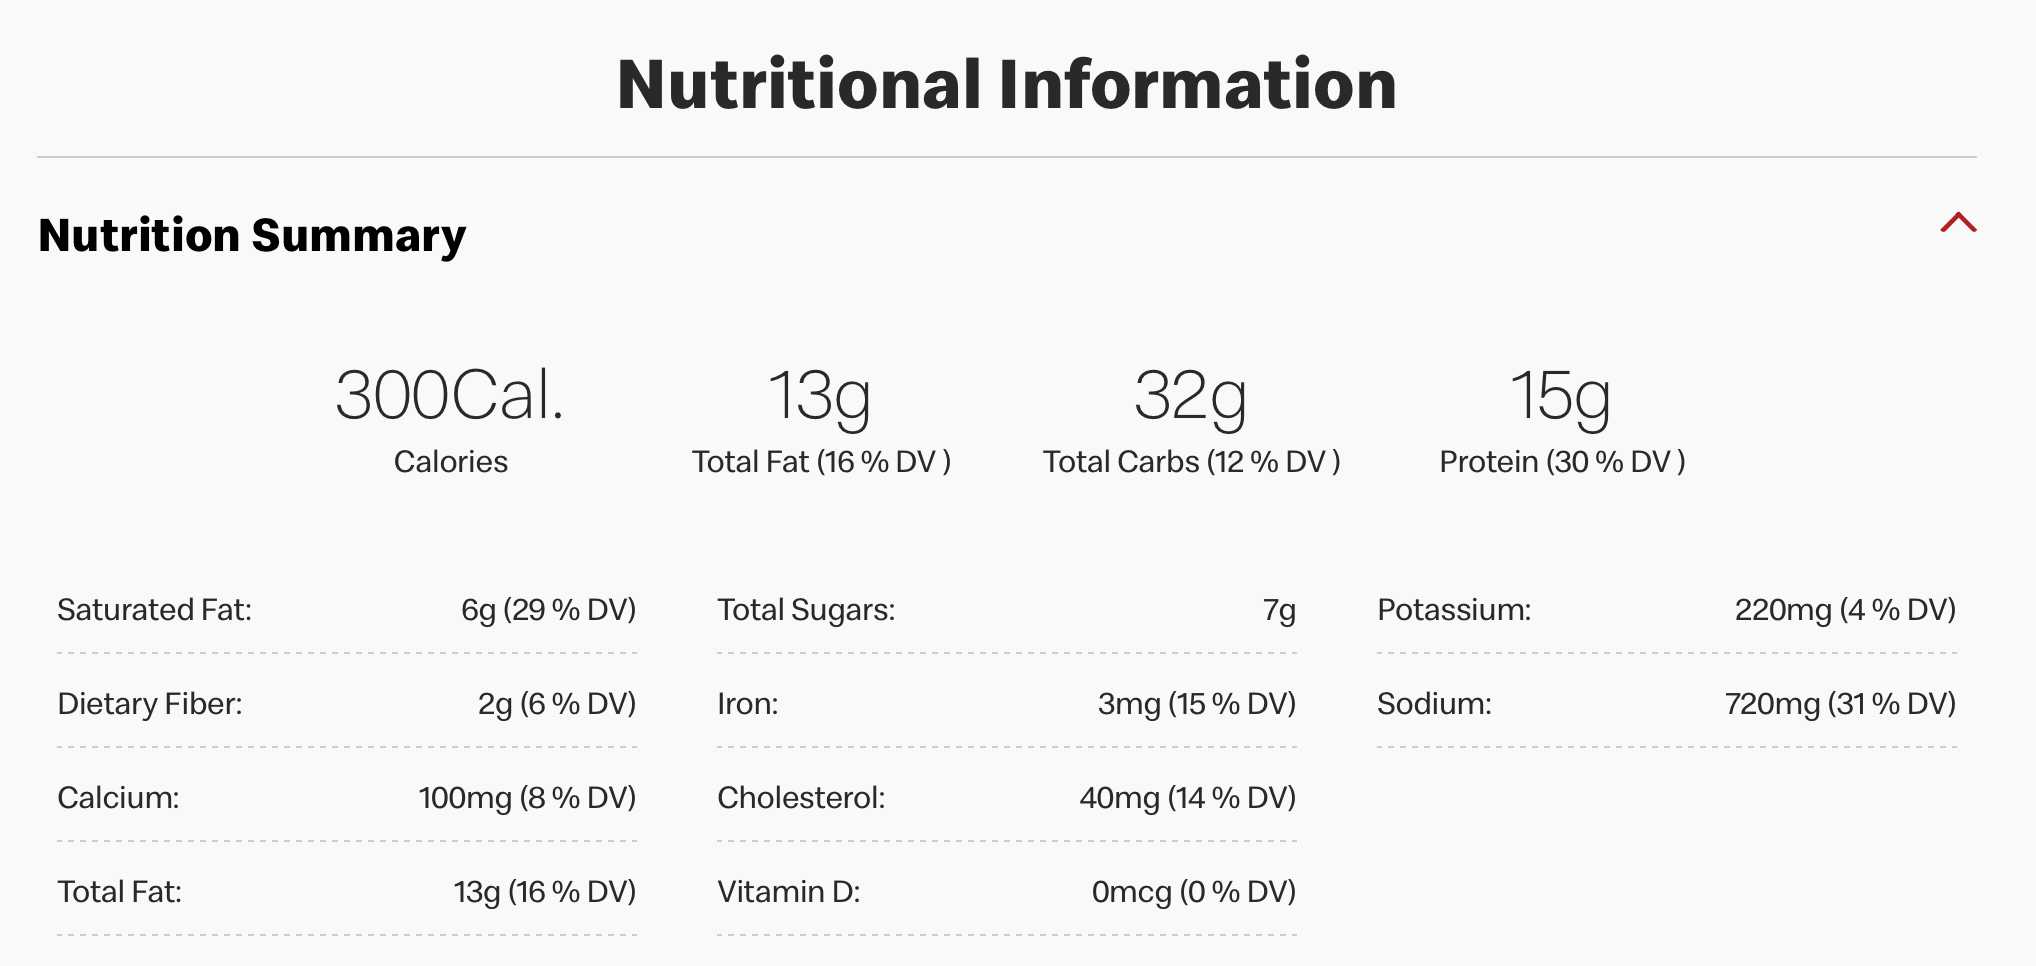

By inputing the above information, the nearest neigbor algorithm gives the following.

In [18]:
Calories = 300 #Kcal
Carbohydrates = 32 #g
Protein = 15 #g
Fat = 13 #g
Sugar = 7 #g
Sodium = 720  #mg

Sodium = Sodium * 0.001 #Changes to gram
Columns = ['Carbohydrates','Protein','Fat','Sugar','Sodium']
Values = np.array([Carbohydrates, Protein, Fat, Sugar, Sodium]) / Calories

Values = pd.DataFrame(dict(zip(Columns, Values)), index = [0])

print(data_McDonalds.iloc[Nearest.kneighbors(Values,n_neighbors = 1)[1][0][0]]['Food Name'])

Hamburger


This time, I will input a set of information of a McDonalds menu that was not part of the fit sample. Sausage Burrito🌯

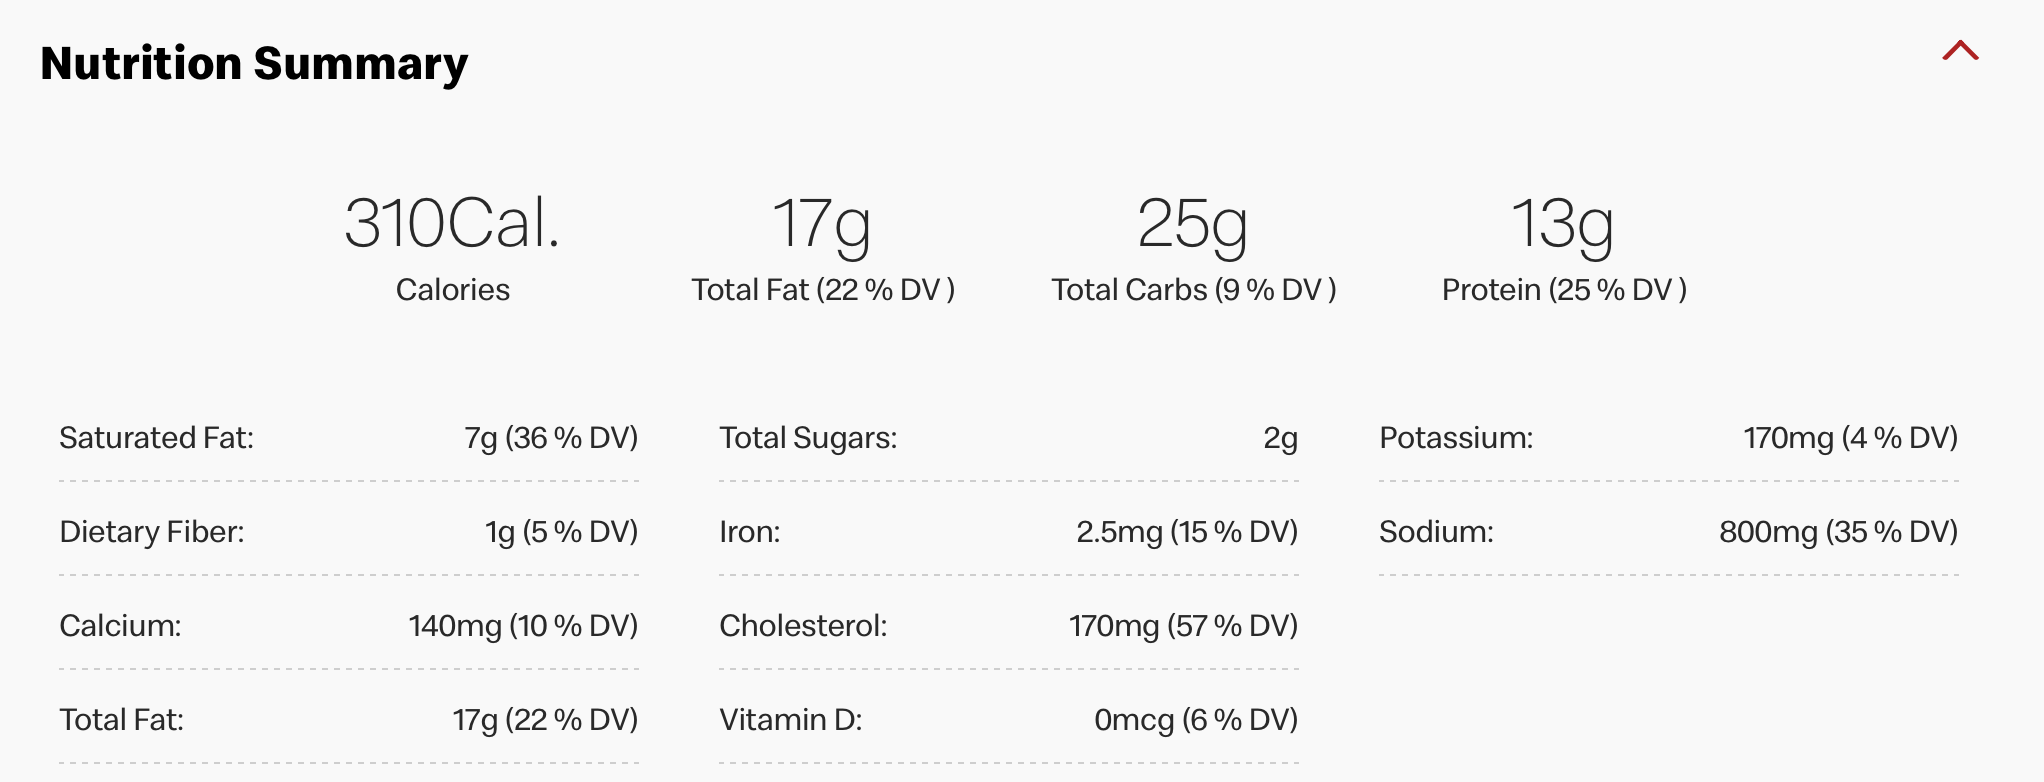

[Source Link](https://www.mcdonalds.com/us/en-us/product/sausage-burrito.html)

In [19]:
Calories = 310 #Kcal
Carbohydrates = 25 #g
Protein = 13 #g
Fat = 17 #g
Sugar = 2 #g
Sodium = 800  #mg

Sodium = Sodium * 0.001 #Changes to gram
Columns = ['Carbohydrates','Protein','Fat','Sugar','Sodium']
Values = np.array([Carbohydrates, Protein, Fat, Sugar, Sodium]) / Calories

Values = pd.DataFrame(dict(zip(Columns, Values)), index = [0])

print(data_McDonalds.iloc[Nearest.kneighbors(Values,n_neighbors = 1)[1][0][0]]['Food Name'])

Cheese Burger


Lastly, Hot Chocolate🍫

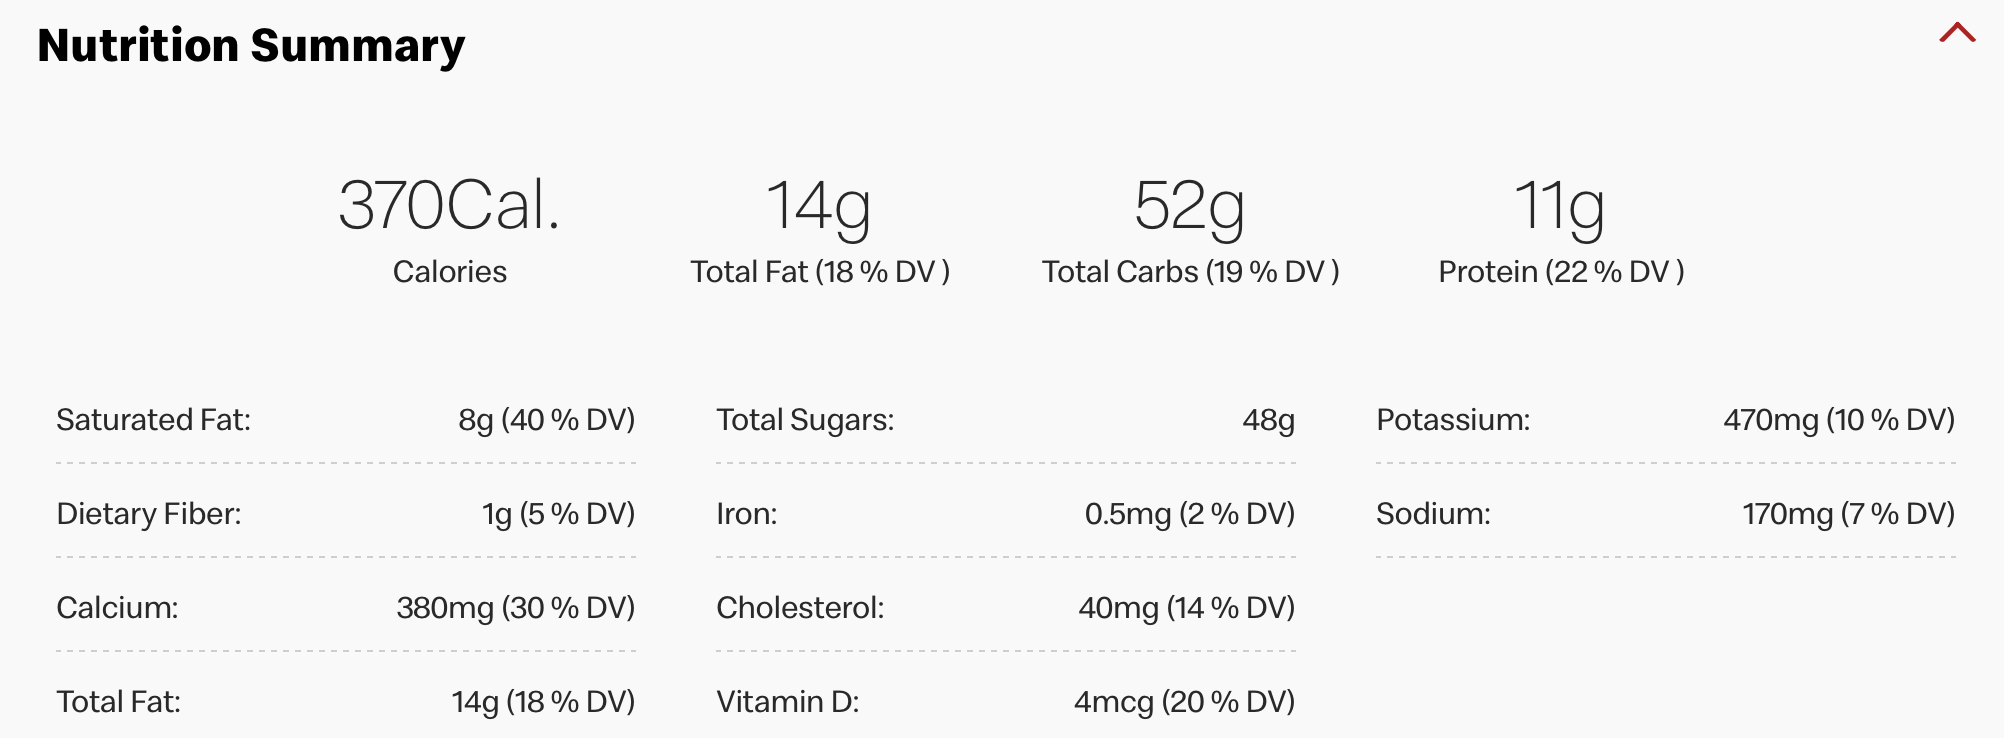

[Source Link](https://www.mcdonalds.com/us/en-us/product/hot-chocolate-small.html)

In [20]:
Calories = 370 #Kcal
Carbohydrates = 52 #g
Protein = 11 #g
Fat = 14 #g
Sugar = 48 #g
Sodium = 170  #mg

Sodium = Sodium * 0.001 #Changes to gram
Columns = ['Carbohydrates','Protein','Fat','Sugar','Sodium']
Values = np.array([Carbohydrates, Protein, Fat, Sugar, Sodium]) / Calories

Values = pd.DataFrame(dict(zip(Columns, Values)), index = [0])

print(data_McDonalds.iloc[Nearest.kneighbors(Values,n_neighbors = 1)[1][0][0]]['Food Name'])

Strawberry Sundae


<ins>Possible Next Steps</ins>

- The scaling that I used might be ineffective/insignificant measure.

- There may be incosistent/incorrect data entries to be dealt with.

- As seen from the McDonalds subset creating section, there seems to be many values with two 'Year Constructed' Values. Perhaps those were times when data was collected. Perhaps data from a certain year can be deleted.